In [19]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from pymatgen import Lattice as lattice, Structure
from pprint import pprint
from IPython.display import Markdown, display
from pymatgen.electronic_structure.plotter import BSPlotter
import matplotlib.pyplot as plt
import numpy as np
def printmd(string):
    display(Markdown(string))

**Structure des bandes électroniques de CdI₂**

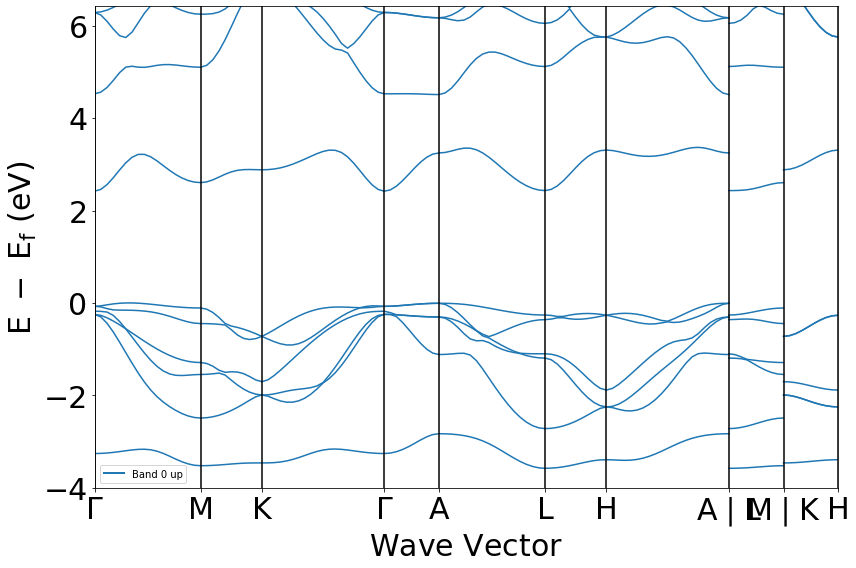

In [28]:
with MPRester("OV6IQnDH4z66TTER") as m:
    structure = m.get_structure_by_material_id("mp-567259")
       
    bandstructure = m.get_bandstructure_by_material_id("mp-567259")
    bandsplot = BSPlotter(bands)
    printmd('**Structure des bandes électroniques de CdI\u2082**')
    a = bandsplot.show()
    b = bandsplot.bs_plot_data()

In [23]:
printmd('**Détermination de la bande interdite**')
bandgap = bandstructure.get_band_gap()
print("Energie : {} ev \nBande directe : {} \nTransition : {}".format(bandgap['energy'], 'oui' if bandgap['direct'] else 'non', bandgap['transition']))
print("On observe une bande interdite indirecte graphiquement. Cela se vérifie avec la fonction get_band_gap() qui précise que la bande indirecte est de de 2.4195 eV lorsque le vecteur d onde k évolue dans la direction (0.176,0.000,0.000)-\Gamma de la zone de Brillouin du cristal. Il s agit donc d un semi-conducteur.")

**Détermination de la bande interdite**

Energie : 2.4195 ev 
Bande directe : non 
Transition : (0.176,0.000,0.000)-\Gamma
On observe une bande interdite indirecte graphiquement. Cela se vérifie avec la fonction get_band_gap() qui précise que la bande indirecte est de de 2.4195 eV lorsque le vecteur d onde k évolue dans la direction (0.176,0.000,0.000)-\Gamma de la zone de Brillouin du cristal. Il s agit donc d un semi-conducteur.


**Détection des direction de dispersion maximale par les bandes de valence et de conduction**

La pente maximale en valeur absolue dans la bande de valence vaut : 1.275806363764815 et correspond a une dispersion maximale dans la direction M-K
Cette pente est représentée par une flèche rouge sur le graphe
La pente minimale en valeur absolue dans la bande de valence vaut : 0.008509526747089196  et correspond a une dispersion minimale dans la direction L-H
Cette pente est représentée par une flèche bleue sur le graphe


La pente maximale en valeur absolue dans la bande de conduction vaut : 1.921721788819892 et correspond a une dispersion maximale dans la direction Γ-A
Cette pente est représentée par une flèche verte sur le graphe
La pente minimale en valeur absolue dans la bande de conduction vaut : 0.06537808468555628 et correspond a une dispersion minimale dans la direction H- A|L 
Cette pente est représentée par une flèche jaune sur le graphe




**Structure des bandes électroniques du CdI₂ avec pentes maximales:**

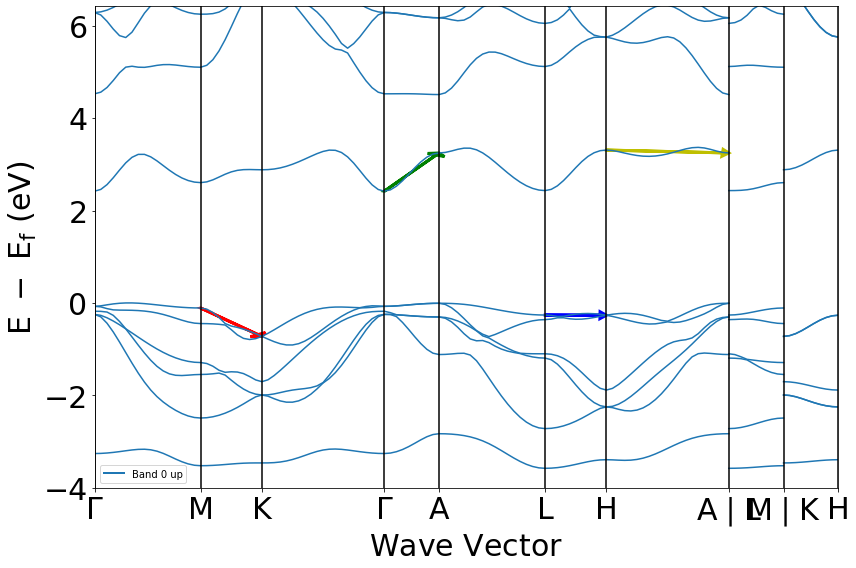

In [29]:
printmd('**Détection des direction de dispersion maximale par les bandes de valence et de conduction**')
bandplot = BSPlotter(bandstructure)
data = bandplot.bs_plot_data()
pl = bandplot.get_plot()
E = data.get('energy')
D = data.get('ticks').get('distance')
vbm = bandstructure.get_vbm()
#print("vbm :" , vbm['band_index'])  #12
cbm = bandstructure.get_cbm()
#print("cbm :", cbm['band_index'])   #13

Vindex = 12
Cindex = 13

Dbranch = [D[0], D[1], D[3], D[5], D[7], D[9], D[11], D[13], D[14], D[15]]
slopeV = np.zeros(9)
slopeC = np.zeros(9)
for k in range(0,9):
    DeltaD = Dbranch[k+1]-Dbranch[k]
    slopeV[k] = abs(((E.get('1')[k][Vindex])[-1] - (E.get('1')[k][Vindex])[0])/(DeltaD) )
    slopeC[k] = abs(((E.get('1')[k][Cindex])[-1] - (E.get('1')[k][Cindex])[0])/(DeltaD) )

#print("pentes bande de valence :", slopeV)
#print("pentes bande de conduction :", slopeC)

maxV = np.amax(slopeV) #slope1
minV = np.amin(slopeV) #slope5
print("La pente maximale en valeur absolue dans la bande de valence vaut :", maxV, "et correspond a une dispersion maximale dans la direction M-K")
print("Cette pente est représentée par une flèche rouge sur le graphe")
print("La pente minimale en valeur absolue dans la bande de valence vaut :", minV, " et correspond a une dispersion minimale dans la direction L-H")
print("Cette pente est représentée par une flèche bleue sur le graphe")
print("\n")
maxC = np.amax(slopeC) #slope3
minC = np.amin(slopeC) #slope6
print("La pente maximale en valeur absolue dans la bande de conduction vaut :", maxC, "et correspond a une dispersion maximale dans la direction \u0393-A")
print("Cette pente est représentée par une flèche verte sur le graphe")
print("La pente minimale en valeur absolue dans la bande de conduction vaut :", minC, "et correspond a une dispersion minimale dans la direction H- A|L ")
print("Cette pente est représentée par une flèche jaune sur le graphe")
print("\n")


#maxV
plt.arrow(Dbranch[1], (E.get('1')[1][Vindex])[0],Dbranch[2] - Dbranch[1], (E.get('1')[1][Vindex])[-1] - (E.get('1')[1][Vindex])[0], head_width=0.15, head_length=0.05, linewidth=3, color='r', length_includes_head=True)
#minV
plt.arrow(Dbranch[5], (E.get('1')[5][Vindex])[0], Dbranch[6] -Dbranch[5], (E.get('1')[5][Vindex])[-1] - (E.get('1')[5][Vindex])[0], head_width=0.15, head_length=0.05, linewidth=3, color='b', length_includes_head=True)
#maxC
plt.arrow(Dbranch[3], (E.get('1')[3][Cindex])[0], Dbranch[4] - Dbranch[3], (E.get('1')[3][Cindex])[-1] - (E.get('1')[3][Cindex])[0], head_width=0.15, head_length=0.05, linewidth=3, color='g', length_includes_head=True)
#minC
plt.arrow(Dbranch[6], (E.get('1')[6][Cindex])[0], Dbranch[7] - Dbranch[6], (E.get('1')[6][Cindex])[-1] - (E.get('1')[6][Cindex])[0], head_width=0.15, head_length=0.05, linewidth=3, color='y', length_includes_head=True)

printmd('**Structure des bandes électroniques du CdI\u2082 avec pentes maximales:**')
plt.show()

In [30]:
printmd('**Calcul de la masse effective à la base de la première bande de valence**')
#constantes
hbar = 1.054571818*10**(-34)
eV = 1.602176563*10**(-19)
A = 10**(-10)

print("En supposant une dispersion parabolique, on peut prendre le point d'energie maximum dans la bande de valence :")
print("Point maximal : (",Dbranch[7], ",", E.get('1')[7][Vindex][0], ")")
print("Pour obtenir l'équation de la parabole, nous avons besoin d'un second point :")
print("Second point : (",Dbranch[6], ",", E.get('1')[6][Vindex][0], ")")

a = abs((E.get('1')[7][Vindex][0])/(Dbranch[7]-Dbranch[6])**2)

d2E =  2*a*(A**(2))*eV
print("\n")
print("Equation parabolique : f(k) =", a, "(k -", Dbranch[8], ")²")
print("Dérivée seconde de la parabole : f''(k) =", 2*a , "[eV.A^2]  =", d2E, "[J.m^2]")
print("Ensuite on calcule la masse effective avec la formule m* = (hbar**2)/((d**2 E)/(dk**2))")
print( "m* =", hbar**2/d2E, "[kg]")

**Calcul de la masse effective à la base de la première bande de valence**

En supposant une dispersion parabolique, on peut prendre le point d'energie maximum dans la bande de valence :
Point maximal : ( 4.990269158896392 , -0.2619999999999999 )
Pour obtenir l'équation de la parabole, nous avons besoin d'un second point :
Second point : ( 4.0266434989675846 , -0.2660999999999999 )


Equation parabolique : f(k) = 0.28215293947436165 (k - 5.420612408794107 )²
Dérivée seconde de la parabole : f''(k) = 0.5643058789487233 [eV.A^2]  = 9.041176536147597e-40 [J.m^2]
Ensuite on calcule la masse effective avec la formule m* = (hbar**2)/((d**2 E)/(dk**2))
m* = 1.2300630508357431e-29 [kg]


In [31]:
printmd('**Calcul de la masse effective au sommet de la dernière bande de conduction**')
#constantes
hbar = 1.054571818*10**(-34)    #[J⋅s]
eV = 1.602176563*10**(-19)
A = 10**(-10)
print("Masse effective dans la bande de conduction")

print("En supposant une dispersion parabolique, on peut prendre le point d'energie minimale dans la bande de conduction : ")
print("Point maximal : (",Dbranch[7], ",", E.get('1')[7][Cindex][0], ")")
print("Pour obtenir l'équation de la parabole, nous avons besoin d'un second point :")
print("Second point : (",Dbranch[6], ",", E.get('1')[6][Cindex][0], ")")

a = abs((E.get('1')[7][Cindex][0])/(Dbranch[7]-Dbranch[6])**2)

d2E =  2*a*(A**(2))*eV

print("\n")
print("Equation parabolique : f(k) =", a, "(k-", Dbranch[7], ")² +", E.get('1')[0][Cindex][5])
print("Dérivée seconde de la parabole : f''(k) =", 2*a , "[eV.A^2]  =", d2E, "[J.m^2]")
print("Ensuite on calcule la masse effective avec la formule m* = (hbar**2)/((d**2 E)/(dk**2))")
print("m* =", hbar**2/d2E, "[kg]")

**Calcul de la masse effective au sommet de la dernière bande de conduction**

Masse effective dans la bande de conduction
En supposant une dispersion parabolique, on peut prendre le point d'energie minimale dans la bande de conduction : 
Point maximal : ( 4.990269158896392 , 2.432 )
Pour obtenir l'équation de la parabole, nous avons besoin d'un second point :
Second point : ( 4.0266434989675846 , 3.3095000000000003 )


Equation parabolique : f(k) = 2.619068506876518 (k- 4.990269158896392 )² + 3.0322
Dérivée seconde de la parabole : f''(k) = 5.238137013753036 [eV.A^2]  = 8.392420357217924e-39 [J.m^2]
Ensuite on calcule la masse effective avec la formule m* = (hbar**2)/((d**2 E)/(dk**2))
m* = 1.3251501616733744e-30 [kg]
